In [1]:
import pandas as pd
import glob
import os

result_df_with_segment = pd.read_csv("data/성과정보_with_segment.csv")
result_df_with_segment

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.000000,0.0,0.409766,...,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543,D
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,...,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000,E
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.000000,0.0,-0.902166,...,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420,C
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.000000,0.0,-0.866052,...,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124,D
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
2399996,201812,TRAIN_399996,0.073804,0.073804,0.073804,0.000000,0.0,0.000000,0.0,0.207099,...,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815,D
2399997,201812,TRAIN_399997,-0.040432,-0.040432,-0.040432,0.000000,0.0,0.000000,0.0,0.254495,...,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000,C
2399998,201812,TRAIN_399998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000034,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E


In [3]:
# '증감율_이용건수'로 시작하는 컬럼만 추출
balance_cols = [col for col in result_df_with_segment.columns if col.startswith("잔액")]

# 결과 확인
print("📌 잔액 관련 컬럼:")
for col in balance_cols:
    print(col)

📌 잔액 관련 컬럼:
잔액_신판평균한도소진율_r6m
잔액_신판최대한도소진율_r6m
잔액_신판평균한도소진율_r3m
잔액_신판최대한도소진율_r3m
잔액_신판ca평균한도소진율_r6m
잔액_신판ca최대한도소진율_r6m
잔액_신판ca평균한도소진율_r3m
잔액_신판ca최대한도소진율_r3m


In [13]:
import pandas as pd

def compare_segment_means_by_period(df):
    # 1. 잔액 관련 컬럼 중 r3m, r6m 구분
    balance_cols_r3m = [col for col in df.columns if col.startswith("잔액_") and 'r3m' in col.lower()]
    balance_cols_r6m = [col for col in df.columns if col.startswith("잔액_") and 'r6m' in col.lower()]

    # 2. Segment별 평균 계산
    segment_means_r3m = df.groupby('Segment')[balance_cols_r3m].mean().round(4)
    segment_means_r6m = df.groupby('Segment')[balance_cols_r6m].mean().round(4)

    # 3. 결과 출력
    print("📊 세그먼트별 r3m 잔액 관련 평균:")
    display(segment_means_r3m)

    print("\n📊 세그먼트별 r6m 잔액 관련 평균:")
    display(segment_means_r6m)

    return segment_means_r3m, segment_means_r6m

In [15]:
r3m_avg, r6m_avg = compare_segment_means_by_period(result_df_with_segment)

📊 세그먼트별 r3m 잔액 관련 평균:


,잔액_신판평균한도소진율_r3m,잔액_신판최대한도소진율_r3m,잔액_신판ca평균한도소진율_r3m,잔액_신판ca최대한도소진율_r3m
Segment,,,,
A,0.2113,0.2694,0.3551,0.4290
B,0.3393,0.4108,0.5614,0.6670
C,0.2103,0.2616,0.3005,0.3673
D,0.2003,0.2468,0.2476,0.3034
E,0.1120,0.1394,0.1236,0.1543



📊 세그먼트별 r6m 잔액 관련 평균:


,잔액_신판평균한도소진율_r6m,잔액_신판최대한도소진율_r6m,잔액_신판ca평균한도소진율_r6m,잔액_신판ca최대한도소진율_r6m
Segment,,,,
A,0.2216,0.3443,0.3620,0.5086
B,0.3443,0.4814,0.5703,0.7413
C,0.2154,0.3143,0.3082,0.4265
D,0.2075,0.2965,0.2572,0.3569
E,0.1187,0.1717,0.1310,0.1869


### 📌 세그먼트별 잔액 한도 소진율 평균 비교 (r3m vs r6m)

**✅ 관찰 포인트:**
- **B 세그먼트**는 모든 지표에서 r3m과 r6m 모두 **가장 높은 평균 잔액 한도 소진율**을 기록.
- **E 세그먼트**는 모든 지표에서 **가장 낮은 평균**을 보여주며, 신용 및 CA 한도 소진 비율이 매우 낮음.
- **A, C, D 세그먼트**는 중간 수준이며, 특히 C와 D는 r3m과 r6m에서 유사한 값 분포를 보임.

| Segment | 잔액_신판평균한도소진율_r3m | 잔액_신판평균한도소진율_r6m | 잔액_신판ca평균한도소진율_r3m | 잔액_신판ca평균한도소진율_r6m |
|---------|-------------------------------|-------------------------------|----------------------------------|----------------------------------|
| A       | 0.2113                        | 0.2216                        | 0.3551                           | 0.3620                           |
| B       | 0.3393                        | 0.3443                        | 0.5614                           | 0.5703                           |
| C       | 0.2103                        | 0.2154                        | 0.3005                           | 0.3082                           |
| D       | 0.2003                        | 0.2075                        | 0.2476                           | 0.2572                           |
| E       | 0.1120                        | 0.1187                        | 0.1236                           | 0.1310                           |

**💡 해석:**
- **r3m과 r6m 간의 수치 차이는 크지 않다.**
- 따라서 **현재로서는 두 기간 모두 유지하고, 향후 모델링 단계에서 기여도를 평가해가며 변수 선택 여부를 결정하는 것이 바람직**함.
- 특히, B 세그먼트의 높은 수치는 한도 대비 잔액 사용이 많은 집단임을 시사하며, 위험 관리나 한도 설정 측면에서의 정책 설계에도 인사이트를 줄 수 있음.


In [24]:
# 결측치 시각화를 위한 라이브러리
import missingno

# 그래프 기본 import
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_balance_correlation_with_segment(df):
    # 1. 사용할 잔액 관련 컬럼 선택
    r3m_cols = [col for col in df.columns if '잔액' in col and 'r3m' in col.lower()]
    r6m_cols = [col for col in df.columns if '잔액' in col and 'r6m' in col.lower()]
    balance_cols = r3m_cols + r6m_cols

    # 2. Segment 더미 인코딩
    df_encoded = df.copy()
    segment_dummies = pd.get_dummies(df_encoded['Segment'], prefix='Segment')
    df_encoded = pd.concat([df_encoded, segment_dummies], axis=1)

    # 3. 상관계수 계산
    corr_cols = balance_cols + list(segment_dummies.columns)
    corr = df_encoded[corr_cols].corr()

    # 4. 잔액 관련 컬럼과 세그먼트 더미 간의 상관관계 추출
    segment_corr = corr.loc[balance_cols, segment_dummies.columns]

    # 5. 히트맵 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(segment_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1)
    plt.title("📈 잔액 관련 컬럼 ↔ 세그먼트(더미) 상관계수 히트맵")
    plt.tight_layout()
    plt.show()

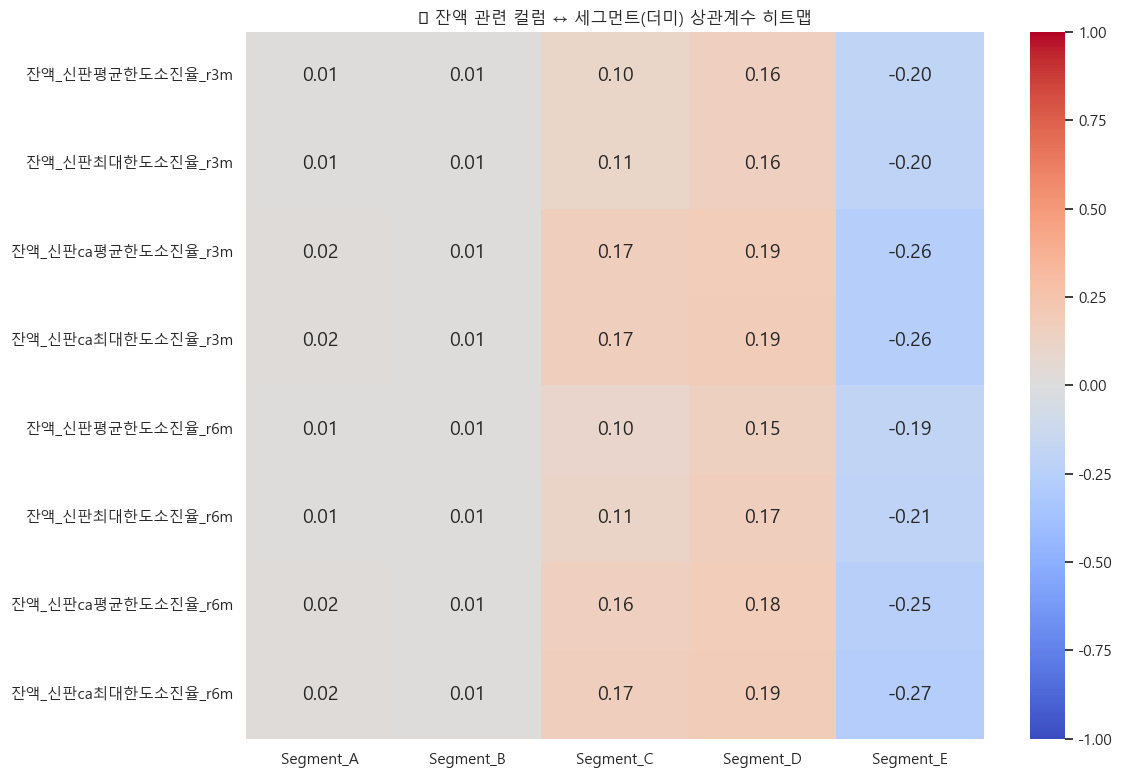

In [28]:
plot_balance_correlation_with_segment(result_df_with_segment)

## 📊 잔액 관련 지표의 세그먼트별 해석

### ✅ 요약
- **Segment B**는 모든 지표에서 월등히 높은 평균값을 보임
- **Segment E**는 가장 낮은 평균값을 지속적으로 유지
- 상관계수 히트맵에서도 **Segment B와는 양의 상관**, **Segment E와는 음의 상관**이 뚜렷하게 나타남
- 특히 `잔액_신판ca최대한도소진율_r6m`은 Segment E와의 음의 상관관계가 -0.27로 가장 큼

---

### 📌 r3m 기준 평균

| Segment | 신판평균한도소진율 | 신판최대한도소진율 | 신판CA평균한도소진율 | 신판CA최대한도소진율 |
|---------|--------------------|---------------------|------------------------|------------------------|
| A       | 0.2113             | 0.2694              | 0.3551                 | 0.4290                 |
| B       | **0.3393**         | **0.4108**          | **0.5614**             | **0.6670**             |
| C       | 0.2103             | 0.2616              | 0.3005                 | 0.3673                 |
| D       | 0.2003             | 0.2468              | 0.2476                 | 0.3034                 |
| E       | *0.1120*           | *0.1394*            | *0.1236*               | *0.1543*               |

---

### 📌 r6m 기준 평균

| Segment | 신판평균한도소진율 | 신판최대한도소진율 | 신판CA평균한도소진율 | 신판CA최대한도소진율 |
|---------|--------------------|---------------------|------------------------|------------------------|
| A       | 0.2216             | 0.3443              | 0.3620                 | 0.5086                 |
| B       | **0.3443**         | **0.4814**          | **0.5703**             | **0.7413**             |
| C       | 0.2154             | 0.3143              | 0.3082                 | 0.4265                 |
| D       | 0.2075             | 0.2965              | 0.2572                 | 0.3569                 |
| E       | *0.1187*           | *0.1717*            | *0.1310*               | *0.1869*               |

---

### 🔍 해석

- **Segment B**는 평균적으로 모든 한도 소진율에서 가장 높은 수치를 보여 **과소비 성향**, **한도 활용률이 높은 고객군**으로 해석 가능
- **Segment E**는 모든 항목에서 낮은 수치로 **신중한 소비 성향**을 지닌 고객군일 가능성이 높음
- 특히 CA (신용할부 캐시서비스) 항목에서의 차이가 큼 → 금융 유동성 혹은 단기 캐시 니즈의 뚜렷한 차이
- 히트맵에서도 Segment E는 거의 모든 항목에서 **음의 상관관계 (-0.19 ~ -0.27)**를 보여줌

---

### ✅ 결론

- **잔액 관련 지표들은 세그먼트 구분에 기여도가 높음**
- 모델링 단계에서 주요 변수로 고려해볼 가치 있음
- 특히 CA 항목을 중심으로 한도 소진율의 차별성이 분명히 드러남


## 📊 r3M vs r6M 컬럼 선택 기준 정리

### ✅ 비교 목적
- **잔액 관련 컬럼**에서 `r3M`과 `r6M` 중 어떤 것이 세그먼트 분류 혹은 성과 예측에 더 기여하는지를 판단하기 위함

---

### 🔍 선택 기준

| 평가 기준 | 설명 | 적용 예시 |
|-----------|------|-----------|
| **1. 목표 변수와의 상관성** | 예측하고자 하는 타겟(Y)과의 상관계수가 높은 쪽이 더 유리 | 예: `성과_Y`와 `잔액_신판평균한도소진율_r6m` 상관계수 ↑ |
| **2. 세그먼트 분류력** | 세그먼트 평균, 히트맵 등을 통해 그룹 간 차이가 뚜렷한 변수 선택 | 현재 분석한 Segment 평균 및 상관 히트맵 |
| **3. 시의성 (정보의 신선도)** | 최근 데이터가 더 중요한 예측이면 `r3M`, 장기적 경향 반영이면 `r6M` |
| **4. 중복 여부 (다중공선성)** | `r3M`과 `r6M`이 유사하다면 하나만 사용하여 변수 수 줄이기 | → 상관계수 확인 필요 |
| **5. 변수의 안정성** | `r3M`은 이상치 영향이 크고 변동성 있음, `r6M`은 평균화로 안정적 | → 분산 비교 필요 |
| **6. 모델 성능 비교** | 각 컬럼군(r3M vs r6M)을 사용한 모델 성능 비교 (AUC, Accuracy 등) | 가장 확실한 기준 |

---

### 🧠 결론 요약

- **직관적 추론**: `r6M`은 더 넓은 범위와 안정성을 갖추고 있어 우선 고려 대상
- **실제 사용 여부 판단은 모델링 이후**:
  - 상관관계
  - 다중공선성
  - 모델 성능 (Feature Importance, AUC 등)
  - 예측력이 높은 쪽 선택

---

### 🔧 추후 진행할 수 있는 분석

- [ ] r3M ↔ r6M 간 컬럼별 상관계수 확인
- [ ] 분산 비교 및 이상치 영향 확인
- [ ] 모델 성능 비교 (예: LightGBM / Logistic Regression)
- [ ] 변수 중요도 시각화 (Feature Importance)
